In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from mpl_toolkits.basemap import Basemap

df = pd.read_csv("kc_house_data.csv")

ModuleNotFoundError: No module named 'folium'

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
lat = df['lat'].values
lon = df['long'].values
price = df['price'].values

In [21]:
print(np.log10(price).max())

6.886490725172482


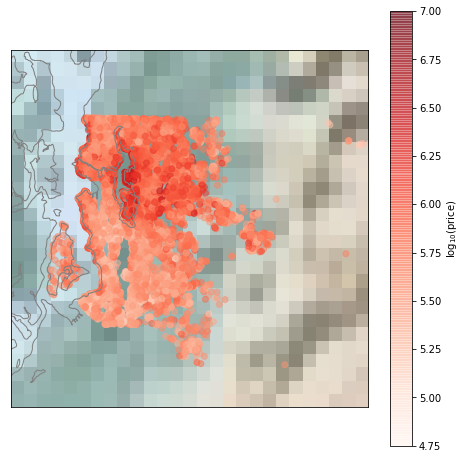

In [39]:
# Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=47.5, lon_0=-122,
            width=100000, height=100000)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Scatter price data, with color reflecting price
m.scatter(lon, lat, latlon=True,
          c=np.log10(price),
          cmap='Reds', alpha=0.5)

#  Create colorbar for reference
plt.colorbar(label=r'$\log_{10}({\rm price})$')
plt.clim(4.75, 7)


plt.show()